In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import dzcnapy_plotlib as dzcnapy
import csv

In [2]:
with open("email-Eu-core.csv") as infile:
    csv_reader = csv.reader(infile)
    DG = nx.DiGraph(csv_reader)
#print(DG.nodes(data = True))

In [3]:
#print(DG.edges(data = True))

In [4]:
with open("email-Eu-core-department-labels.csv") as infile:
    csv_reader = csv.reader(infile)
    mydict = {rows[0]: {'department': int(rows[1])} for rows in csv_reader}

In [5]:
#print(mydict)

In [6]:
nx.set_node_attributes(DG, mydict)
print(DG.nodes(data = True))

[('0', {'department': 1}), ('1', {'department': 1}), ('2', {'department': 21}), ('3', {'department': 21}), ('4', {'department': 21}), ('5', {'department': 25}), ('6', {'department': 25}), ('7', {'department': 14}), ('8', {'department': 14}), ('9', {'department': 14}), ('10', {'department': 9}), ('11', {'department': 14}), ('12', {'department': 14}), ('13', {'department': 26}), ('14', {'department': 4}), ('15', {'department': 17}), ('16', {'department': 34}), ('17', {'department': 1}), ('18', {'department': 1}), ('19', {'department': 14}), ('20', {'department': 9}), ('21', {'department': 9}), ('22', {'department': 9}), ('23', {'department': 11}), ('24', {'department': 11}), ('25', {'department': 11}), ('26', {'department': 11}), ('27', {'department': 11}), ('28', {'department': 11}), ('29', {'department': 11}), ('30', {'department': 11}), ('31', {'department': 11}), ('32', {'department': 11}), ('33', {'department': 11}), ('34', {'department': 11}), ('35', {'department': 11}), ('36', {'d

In [7]:
nx.write_graphml(DG, "emails_dep.graphml")

In [8]:
DG_only_dep = nx.Graph()
for node in DG.nodes(data = True):
    label, attr_dict = node
    DG_only_dep.add_node(attr_dict["department"])
    
print(nx.info(DG_only_dep))

Name: 
Type: Graph
Number of nodes: 42
Number of edges: 0
Average degree:   0.0000


In [9]:
for edge in DG.edges(data=True):
    #print(edge)
    source, target, edg_attr = edge
    source_dep = mydict[source]['department']
    targ_dep = mydict[target]['department']
    if DG_only_dep.has_edge(source_dep, targ_dep) == False:
        DG_only_dep.add_edge(source_dep, targ_dep, weight = 1)
    else:
        edges = DG_only_dep.edges
        w = edges[source_dep, targ_dep]['weight']
        DG_only_dep.add_edge(source_dep, targ_dep, weight = w+1)
print(nx.info(DG_only_dep))

Name: 
Type: Graph
Number of nodes: 42
Number of edges: 681
Average degree:  32.4286


In [10]:
print(DG_only_dep.edges(data=True))

[(1, 1, {'weight': 539}), (1, 15, {'weight': 104}), (1, 39, {'weight': 54}), (1, 3, {'weight': 18}), (1, 0, {'weight': 54}), (1, 7, {'weight': 103}), (1, 14, {'weight': 52}), (1, 16, {'weight': 5}), (1, 31, {'weight': 42}), (1, 20, {'weight': 4}), (1, 25, {'weight': 38}), (1, 19, {'weight': 5}), (1, 36, {'weight': 237}), (1, 21, {'weight': 25}), (1, 26, {'weight': 32}), (1, 4, {'weight': 129}), (1, 34, {'weight': 73}), (1, 37, {'weight': 19}), (1, 35, {'weight': 49}), (1, 6, {'weight': 38}), (1, 38, {'weight': 43}), (1, 23, {'weight': 53}), (1, 2, {'weight': 17}), (1, 29, {'weight': 4}), (1, 9, {'weight': 48}), (1, 24, {'weight': 6}), (1, 17, {'weight': 5}), (1, 11, {'weight': 11}), (1, 12, {'weight': 1}), (1, 5, {'weight': 26}), (1, 27, {'weight': 1}), (1, 13, {'weight': 28}), (1, 10, {'weight': 34}), (1, 40, {'weight': 7}), (1, 41, {'weight': 4}), (1, 8, {'weight': 8}), (1, 22, {'weight': 5}), (1, 28, {'weight': 8}), (1, 32, {'weight': 3}), (1, 30, {'weight': 2}), (21, 21, {'weight':

In [11]:
nx.write_graphml(DG_only_dep, "dep_only.graphml")
# TODO: remove self loops and add their weight as attribute of nodes

In [12]:
print(DG['0'])

{'1': {}, '316': {}, '146': {}, '268': {}, '581': {}, '221': {}, '18': {}, '734': {}, '178': {}, '380': {}, '0': {}, '459': {}, '215': {}, '250': {}, '148': {}, '73': {}, '498': {}, '226': {}, '101': {}, '218': {}, '377': {}, '17': {}, '74': {}, '177': {}, '248': {}, '103': {}, '560': {}, '309': {}, '88': {}, '5': {}, '297': {}, '313': {}, '223': {}, '238': {}, '368': {}, '266': {}, '222': {}, '283': {}, '6': {}, '64': {}, '166': {}}


In [13]:
print("density of emails:", str(nx.density(DG)))
print("density of deps:", str(nx.density(DG_only_dep)))

density of emails: 0.025342411448732432
density of deps: 0.7909407665505227


In [14]:
G = DG.to_undirected()  # Undirected version of graph used for the computation of clustering coefficient
nx.average_clustering(G)

0.3993549664221539

In [15]:
central_node = 160

cc_central_node = nx.clustering(G, str(central_node))
betweenness = nx.betweenness_centrality(DG, normalized = False)
print("clustering coefficient:", str(cc_central_node))
print("betweenness of nodes:", str(betweenness))
type(betweenness)

clustering coefficient: 0.09351196494775868
betweenness of nodes: {'0': 1548.732711772583, '1': 0.0, '2': 5850.7025488610425, '3': 1536.6856003944515, '4': 5232.020213445737, '5': 27174.02169102858, '6': 12722.776976944997, '7': 2976.6751760880616, '8': 755.45847187551, '9': 480.9143252228849, '10': 1185.073644948173, '11': 5115.525290375631, '12': 4559.996036798694, '13': 10873.680857997577, '14': 3381.010243515185, '15': 2192.226766772277, '16': 1140.9271440771845, '17': 4840.115652338846, '18': 2294.2477558039745, '19': 4228.629105042066, '20': 3585.665765959523, '21': 12738.096111006318, '22': 89.06728288294357, '23': 2977.717640849257, '24': 1172.1837811519179, '25': 235.98248946056705, '26': 119.69785687742731, '27': 1832.727676076164, '28': 5519.884862107221, '29': 1285.8029855889947, '30': 2187.141178130908, '31': 441.63159145567505, '32': 121.79567320987869, '33': 142.80670385976273, '34': 146.49204694946988, '35': 1669.5858221132892, '36': 228.64239366842392, '37': 241.938892

dict

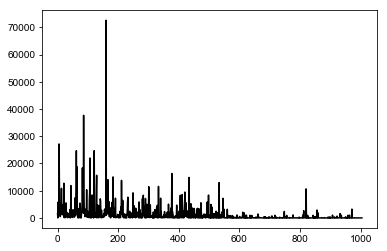

In [16]:
lis = []
for key in betweenness.keys():
    lis.append(betweenness[key])

plt.plot(range(len(lis)), lis)

In [17]:
print("betweenness of departments:", str(nx.betweenness_centrality(DG_only_dep, normalized = False)))

betweenness of departments: {1: 10.190677776183604, 21: 8.357407430021457, 25: 4.638564501090789, 14: 6.467265077770905, 9: 5.283051647582242, 26: 12.021258306764135, 4: 45.23643002445134, 17: 1.9643378536985068, 34: 10.190677776183604, 11: 4.716423836077672, 5: 0.8561535179054752, 10: 10.49740209761381, 36: 18.32401110951694, 37: 8.161065340688815, 7: 6.644448676479272, 22: 3.328023220967801, 8: 6.383421688169675, 15: 16.044671005176838, 3: 0.063894523326572, 29: 0.6350262796043239, 20: 1.4588673768119576, 16: 0.8528909672516203, 38: 8.80646434599494, 27: 0.6541513393699301, 13: 3.6974020976138062, 6: 3.549941731734722, 0: 1.4259789903396434, 28: 2.6135722976192213, 2: 1.3353157916947003, 40: 2.5965002412478912, 35: 6.467265077770905, 23: 1.9350864023289869, 19: 5.33839449247591, 24: 0.2975606909430438, 32: 1.371053756740273, 31: 0.09637605042016806, 39: 0.28983928719703245, 12: 0.1421630874572051, 30: 0.06696428571428571, 41: 0.0, 18: 0.0, 33: 0.0}


[('0', 73), ('1', 52), ('2', 161), ('3', 118), ('4', 163), ('5', 280), ('6', 202), ('7', 116), ('8', 62), ('9', 60), ('10', 75), ('11', 134), ('12', 96), ('13', 233), ('14', 128), ('15', 82), ('16', 115), ('17', 167), ('18', 88), ('19', 120), ('20', 118), ('21', 240), ('22', 27), ('23', 132), ('24', 63), ('25', 50), ('26', 53), ('27', 96), ('28', 174), ('29', 94), ('30', 112), ('31', 82), ('32', 55), ('33', 43), ('34', 49), ('35', 97), ('36', 63), ('37', 54), ('38', 70), ('39', 49), ('40', 101), ('41', 140), ('42', 117), ('43', 19), ('44', 175), ('45', 76), ('46', 117), ('47', 84), ('48', 97), ('49', 23), ('50', 27), ('51', 110), ('52', 42), ('53', 58), ('54', 90), ('55', 71), ('56', 80), ('57', 114), ('58', 218), ('59', 90), ('60', 91), ('61', 118), ('62', 369), ('63', 218), ('64', 249), ('65', 124), ('66', 46), ('67', 15), ('68', 79), ('69', 101), ('70', 28), ('71', 29), ('72', 12), ('73', 54), ('74', 158), ('75', 32), ('76', 37), ('77', 35), ('78', 23), ('79', 70), ('80', 119), ('81

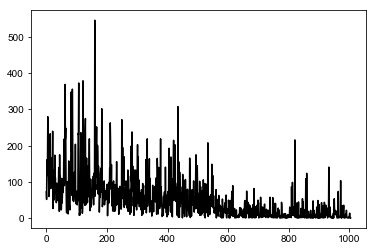

In [18]:
print(nx.degree(DG))
lis2 = []

for x, y in nx.degree(DG):
    lis2.append(y)

plt.plot(range(len(lis2)), lis2)

Counter({1: 71, 2: 48, 4: 33, 3: 31, 7: 26, 6: 23, 8: 21, 5: 18, 32: 15, 11: 15, 49: 14, 15: 14, 37: 14, 14: 14, 36: 14, 28: 13, 27: 12, 31: 12, 16: 12, 54: 11, 19: 11, 40: 11, 20: 11, 43: 10, 23: 10, 46: 10, 12: 10, 25: 10, 41: 10, 17: 10, 58: 9, 79: 9, 44: 9, 10: 9, 22: 9, 60: 8, 50: 8, 80: 8, 9: 8, 62: 7, 63: 7, 74: 7, 59: 7, 30: 7, 82: 6, 88: 6, 42: 6, 124: 6, 29: 6, 35: 6, 45: 6, 64: 6, 38: 6, 13: 6, 75: 5, 96: 5, 53: 5, 76: 5, 110: 5, 90: 5, 48: 5, 83: 5, 67: 5, 99: 5, 39: 5, 24: 5, 47: 5, 33: 5, 18: 5, 26: 5, 73: 4, 118: 4, 97: 4, 91: 4, 77: 4, 68: 4, 21: 4, 69: 4, 133: 4, 103: 4, 57: 4, 34: 4, 52: 3, 116: 3, 94: 3, 55: 3, 70: 3, 117: 3, 84: 3, 114: 3, 56: 3, 144: 3, 66: 3, 219: 3, 86: 3, 108: 3, 61: 3, 51: 3, 141: 3, 87: 3, 163: 2, 112: 2, 101: 2, 140: 2, 175: 2, 71: 2, 218: 2, 234: 2, 127: 2, 166: 2, 93: 2, 193: 2, 169: 2, 85: 2, 138: 2, 72: 2, 107: 2, 170: 2, 102: 2, 203: 2, 106: 2, 111: 2, 65: 2, 104: 2, 161: 1, 280: 1, 202: 1, 134: 1, 233: 1, 128: 1, 115: 1, 167: 1, 120: 1,

/Users/claudio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


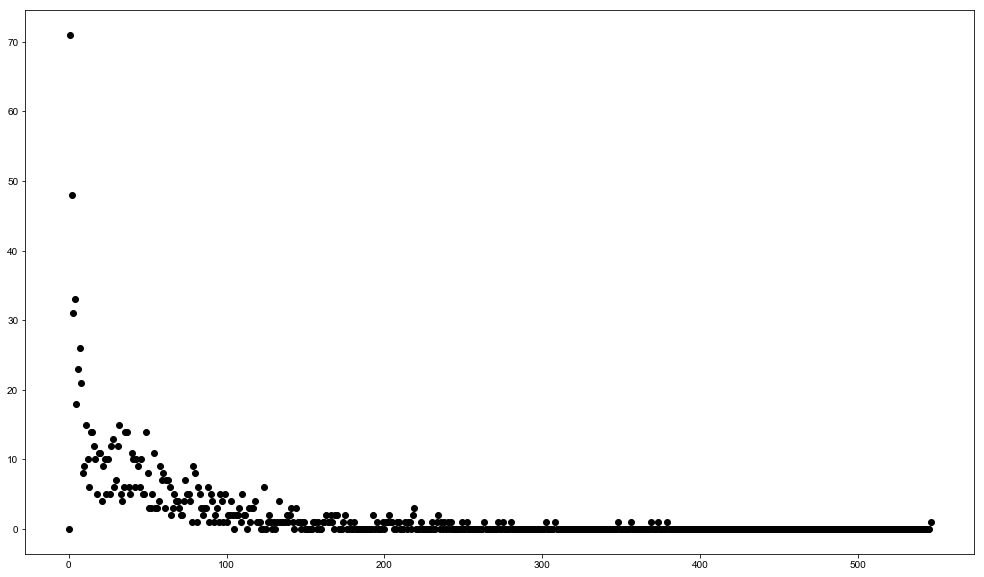

In [63]:
from collections import Counter
counter = Counter(lis2)
#count, _ = np.histogram(lis2, bins=15)
print(counter)

max_degree = max(counter.keys())
print(max_degree)
degrees_freq = np.zeros(max_degree+1)
print(degrees_freq)
for i in range(max_degree+1):
    degrees_freq[i] = counter[i]

print(degrees_freq)
log_degrees_freq = np.log(degrees_freq)

plt.figure(1, figsize=(17, 10))

axes = plt.gca()
#axes.set_xlim([0, 14])
#axes.set_ylim([0, 8])

#plt.plot(count)
degrees = np.arange(0, max_degree+1)
plt.scatter(degrees, degrees_freq)
plt.savefig("degree_distribution.png")

/Users/claudio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


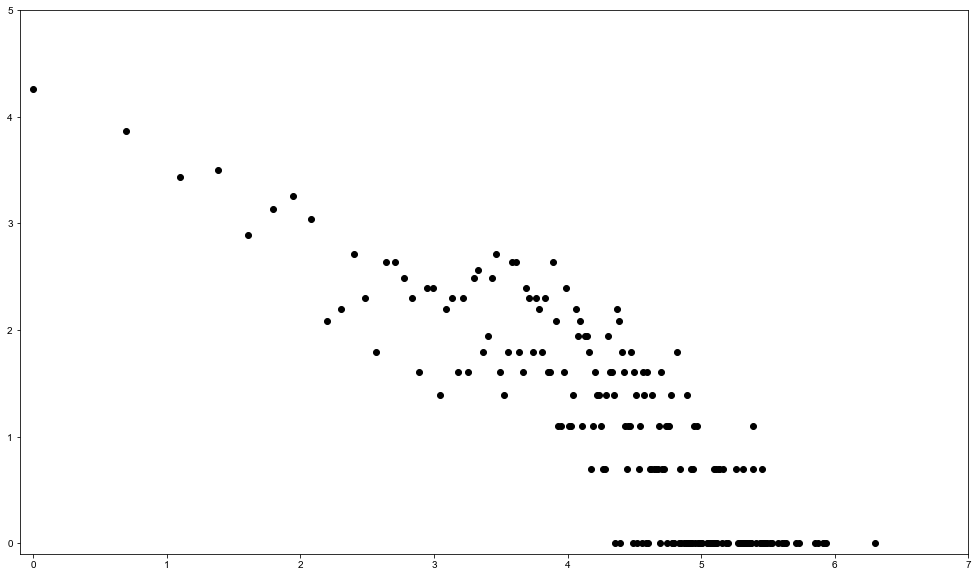

In [64]:
plt.figure(1, figsize=(17, 10))
axes = plt.gca()
axes.set_xlim([-0.10, 7])
axes.set_ylim([-0.1, 5])
plt.scatter(np.log(degrees), np.log(degrees_freq))
plt.savefig("log_log_degree.png")

In [27]:
for source, dictionary in nx.shortest_path_length(G):
    print(source)
    print(dictionary)
    print()

0
{'0': 0, '1': 1, '316': 1, '146': 1, '268': 1, '581': 1, '221': 1, '18': 1, '734': 1, '178': 1, '380': 1, '459': 1, '215': 1, '250': 1, '148': 1, '73': 1, '498': 1, '226': 1, '101': 1, '218': 1, '377': 1, '17': 1, '74': 1, '177': 1, '248': 1, '103': 1, '560': 1, '309': 1, '88': 1, '5': 1, '297': 1, '313': 1, '223': 1, '238': 1, '368': 1, '266': 1, '222': 1, '283': 1, '6': 1, '64': 1, '166': 1, '65': 1, '120': 1, '21': 2, '52': 2, '82': 2, '84': 2, '85': 2, '106': 2, '121': 2, '127': 2, '128': 2, '142': 2, '147': 2, '155': 2, '187': 2, '189': 2, '199': 2, '224': 2, '225': 2, '232': 2, '254': 2, '255': 2, '280': 2, '284': 2, '310': 2, '317': 2, '351': 2, '450': 2, '495': 2, '537': 2, '548': 2, '549': 2, '568': 2, '616': 2, '641': 2, '726': 2, '979': 2, '160': 2, '253': 2, '379': 2, '758': 2, '468': 2, '231': 2, '465': 2, '420': 2, '341': 2, '409': 2, '424': 2, '435': 2, '519': 2, '629': 2, '690': 2, '695': 2, '793': 2, '905': 2, '13': 2, '66': 2, '67': 2, '779': 2, '299': 2, '615': 2, 

17
{'17': 0, '0': 1, '18': 1, '120': 1, '218': 1, '307': 1, '308': 1, '1': 1, '177': 1, '74': 1, '309': 1, '215': 1, '248': 1, '220': 1, '310': 1, '85': 1, '311': 1, '221': 1, '312': 1, '222': 1, '313': 1, '223': 1, '224': 1, '314': 1, '225': 1, '315': 1, '226': 1, '73': 1, '316': 1, '317': 1, '228': 1, '42': 1, '87': 1, '393': 1, '62': 1, '121': 1, '654': 1, '107': 1, '155': 1, '82': 1, '615': 1, '160': 1, '154': 1, '282': 1, '434': 1, '142': 1, '249': 1, '105': 1, '297': 1, '166': 1, '255': 1, '467': 1, '386': 1, '494': 1, '295': 1, '533': 1, '253': 1, '546': 1, '405': 1, '189': 1, '283': 1, '612': 1, '162': 1, '495': 1, '340': 1, '363': 1, '643': 1, '366': 1, '378': 1, '106': 1, '212': 1, '83': 1, '86': 1, '726': 1, '459': 1, '671': 1, '21': 1, '341': 1, '252': 1, '441': 1, '233': 1, '163': 1, '269': 1, '23': 1, '404': 1, '493': 1, '532': 1, '427': 1, '474': 1, '180': 1, '41': 1, '153': 1, '115': 1, '173': 1, '147': 1, '424': 1, '431': 1, '872': 1, '422': 1, '146': 1, '473': 1, '219

35
{'35': 0, '5': 1, '13': 1, '22': 1, '23': 1, '24': 1, '26': 1, '27': 1, '28': 1, '29': 1, '30': 1, '31': 1, '32': 1, '33': 1, '34': 1, '62': 1, '438': 1, '51': 1, '129': 1, '434': 1, '39': 1, '168': 1, '151': 1, '301': 1, '25': 1, '590': 1, '36': 1, '37': 1, '38': 1, '40': 1, '588': 1, '170': 1, '128': 1, '165': 1, '367': 1, '107': 1, '655': 1, '878': 1, '464': 1, '14': 1, '261': 1, '486': 1, '121': 1, '338': 1, '114': 1, '473': 1, '86': 1, '116': 1, '160': 1, '169': 1, '183': 1, '282': 1, '339': 1, '409': 1, '442': 1, '455': 1, '533': 1, '953': 1, '0': 2, '2': 2, '6': 2, '7': 2, '215': 2, '117': 2, '64': 2, '327': 2, '232': 2, '53': 2, '115': 2, '528': 2, '140': 2, '105': 2, '489': 2, '527': 2, '357': 2, '58': 2, '279': 2, '59': 2, '669': 2, '211': 2, '194': 2, '305': 2, '284': 2, '644': 2, '379': 2, '157': 2, '191': 2, '281': 2, '42': 2, '437': 2, '125': 2, '76': 2, '74': 2, '309': 2, '269': 2, '21': 2, '430': 2, '89': 2, '726': 2, '495': 2, '730': 2, '807': 2, '189': 2, '408': 2,

52
{'52': 0, '53': 1, '185': 1, '368': 1, '232': 1, '595': 1, '146': 1, '537': 1, '1': 1, '314': 1, '103': 1, '781': 1, '814': 1, '820': 1, '61': 1, '157': 1, '397': 1, '221': 1, '301': 1, '377': 1, '719': 1, '197': 1, '128': 1, '786': 1, '133': 1, '5': 2, '13': 2, '14': 2, '280': 2, '466': 2, '129': 2, '182': 2, '231': 2, '215': 2, '434': 2, '440': 2, '380': 2, '389': 2, '85': 2, '394': 2, '312': 2, '526': 2, '465': 2, '18': 2, '178': 2, '403': 2, '486': 2, '420': 2, '82': 2, '65': 2, '167': 2, '183': 2, '199': 2, '822': 2, '922': 2, '97': 2, '100': 2, '124': 2, '354': 2, '353': 2, '533': 2, '323': 2, '708': 2, '98': 2, '687': 2, '371': 2, '618': 2, '640': 2, '768': 2, '99': 2, '404': 2, '662': 2, '125': 2, '101': 2, '709': 2, '800': 2, '0': 2, '60': 2, '83': 2, '86': 2, '104': 2, '112': 2, '121': 2, '150': 2, '160': 2, '181': 2, '250': 2, '275': 2, '283': 2, '295': 2, '320': 2, '321': 2, '366': 2, '387': 2, '393': 2, '379': 2, '375': 2, '392': 2, '376': 2, '841': 2, '896': 2, '390': 

68
{'68': 0, '16': 1, '20': 1, '21': 1, '62': 1, '64': 1, '69': 1, '80': 1, '86': 1, '82': 1, '663': 1, '184': 1, '671': 1, '474': 1, '509': 1, '667': 1, '473': 1, '550': 1, '549': 1, '508': 1, '160': 1, '329': 1, '357': 1, '424': 1, '418': 1, '494': 1, '301': 1, '173': 1, '106': 1, '183': 1, '121': 1, '679': 1, '306': 1, '300': 1, '282': 1, '107': 1, '220': 1, '142': 1, '212': 1, '366': 1, '420': 1, '92': 1, '287': 1, '400': 1, '419': 1, '678': 1, '932': 1, '15': 2, '495': 2, '128': 2, '63': 2, '132': 2, '174': 2, '255': 2, '44': 2, '518': 2, '434': 2, '290': 2, '355': 2, '105': 2, '210': 2, '405': 2, '283': 2, '489': 2, '81': 2, '367': 2, '170': 2, '280': 2, '337': 2, '828': 2, '221': 2, '771': 2, '362': 2, '157': 2, '308': 2, '164': 2, '642': 2, '209': 2, '269': 2, '222': 2, '281': 2, '304': 2, '311': 2, '115': 2, '338': 2, '448': 2, '45': 2, '46': 2, '93': 2, '153': 2, '169': 2, '187': 2, '190': 2, '196': 2, '211': 2, '249': 2, '258': 2, '263': 2, '295': 2, '305': 2, '340': 2, '356

87
{'87': 0, '17': 1, '21': 1, '23': 1, '28': 1, '41': 1, '42': 1, '49': 1, '50': 1, '58': 1, '62': 1, '63': 1, '64': 1, '69': 1, '74': 1, '81': 1, '82': 1, '83': 1, '84': 1, '86': 1, '422': 1, '154': 1, '145': 1, '484': 1, '441': 1, '493': 1, '131': 1, '438': 1, '626': 1, '115': 1, '513': 1, '474': 1, '533': 1, '153': 1, '434': 1, '453': 1, '155': 1, '615': 1, '518': 1, '363': 1, '546': 1, '642': 1, '495': 1, '255': 1, '490': 1, '106': 1, '427': 1, '269': 1, '212': 1, '163': 1, '404': 1, '105': 1, '424': 1, '643': 1, '173': 1, '654': 1, '249': 1, '13': 1, '189': 1, '190': 1, '665': 1, '160': 1, '236': 1, '223': 1, '77': 1, '333': 1, '282': 1, '506': 1, '547': 1, '509': 1, '459': 1, '187': 1, '222': 1, '107': 1, '543': 1, '820': 1, '180': 1, '183': 1, '545': 1, '412': 1, '166': 1, '283': 1, '329': 1, '161': 1, '303': 1, '152': 1, '210': 1, '371': 1, '256': 1, '296': 1, '351': 1, '129': 1, '365': 1, '233': 1, '393': 1, '828': 1, '300': 1, '211': 1, '137': 1, '20': 1, '353': 1, '426': 1,

106
{'106': 0, '5': 1, '11': 1, '16': 1, '17': 1, '20': 1, '21': 1, '42': 1, '44': 1, '46': 1, '62': 1, '68': 1, '72': 1, '73': 1, '74': 1, '80': 1, '81': 1, '82': 1, '83': 1, '86': 1, '87': 1, '90': 1, '105': 1, '187': 1, '189': 1, '249': 1, '268': 1, '405': 1, '190': 1, '495': 1, '551': 1, '490': 1, '459': 1, '671': 1, '188': 1, '589': 1, '434': 1, '365': 1, '147': 1, '340': 1, '690': 1, '160': 1, '256': 1, '298': 1, '582': 1, '1': 1, '129': 1, '303': 1, '212': 1, '329': 1, '155': 1, '145': 1, '371': 1, '549': 1, '550': 1, '221': 1, '211': 1, '183': 1, '462': 1, '222': 1, '107': 1, '287': 1, '717': 1, '420': 1, '424': 1, '255': 1, '355': 1, '184': 1, '467': 1, '771': 1, '828': 1, '300': 1, '279': 1, '230': 1, '356': 1, '642': 1, '358': 1, '223': 1, '314': 1, '518': 1, '419': 1, '357': 1, '283': 1, '169': 1, '820': 1, '372': 1, '373': 1, '454': 1, '560': 1, '885': 1, '282': 1, '142': 1, '226': 1, '756': 1, '132': 1, '259': 1, '641': 1, '295': 1, '311': 1, '473': 1, '64': 1, '280': 1, 

126
{'126': 0, '4': 1, '6': 1, '13': 1, '54': 1, '55': 1, '56': 1, '57': 1, '58': 1, '63': 1, '211': 1, '286': 1, '586': 1, '552': 1, '208': 1, '271': 1, '137': 1, '723': 1, '698': 1, '138': 1, '411': 1, '174': 1, '2': 1, '812': 1, '285': 1, '131': 1, '173': 1, '209': 1, '300': 1, '405': 1, '408': 1, '564': 1, '635': 1, '638': 1, '3': 2, '62': 2, '194': 2, '195': 2, '114': 2, '81': 2, '193': 2, '665': 2, '160': 2, '412': 2, '107': 2, '59': 2, '520': 2, '571': 2, '281': 2, '282': 2, '283': 2, '301': 2, '192': 2, '481': 2, '305': 2, '434': 2, '424': 2, '121': 2, '142': 2, '809': 2, '158': 2, '532': 2, '826': 2, '832': 2, '239': 2, '685': 2, '803': 2, '845': 2, '612': 2, '256': 2, '587': 2, '145': 2, '712': 2, '738': 2, '252': 2, '533': 2, '102': 2, '162': 2, '859': 2, '89': 2, '170': 2, '169': 2, '425': 2, '625': 2, '96': 2, '183': 2, '896': 2, '971': 2, '990': 2, '82': 2, '323': 2, '360': 2, '430': 2, '166': 2, '880': 2, '1001': 2, '273': 2, '303': 2, '329': 2, '431': 2, '0': 2, '5': 2,

146
{'146': 0, '0': 1, '13': 1, '17': 1, '21': 1, '52': 1, '66': 1, '85': 1, '147': 1, '67': 1, '187': 1, '779': 1, '1': 1, '299': 1, '615': 1, '18': 1, '81': 1, '189': 1, '601': 1, '166': 1, '316': 1, '368': 1, '177': 1, '120': 1, '183': 1, '160': 1, '226': 1, '533': 1, '549': 1, '268': 2, '581': 2, '221': 2, '734': 2, '178': 2, '380': 2, '459': 2, '215': 2, '250': 2, '148': 2, '73': 2, '498': 2, '101': 2, '218': 2, '377': 2, '74': 2, '248': 2, '103': 2, '560': 2, '309': 2, '88': 2, '5': 2, '297': 2, '313': 2, '223': 2, '238': 2, '266': 2, '222': 2, '283': 2, '6': 2, '64': 2, '65': 2, '2': 2, '4': 2, '10': 2, '12': 2, '126': 2, '27': 2, '209': 2, '301': 2, '36': 2, '446': 2, '35': 2, '25': 2, '303': 2, '95': 2, '129': 2, '506': 2, '535': 2, '90': 2, '118': 2, '352': 2, '550': 2, '179': 2, '624': 2, '420': 2, '286': 2, '444': 2, '306': 2, '418': 2, '128': 2, '165': 2, '329': 2, '23': 2, '214': 2, '340': 2, '443': 2, '576': 2, '171': 2, '461': 2, '137': 2, '130': 2, '337': 2, '278': 2, 

166
{'166': 0, '0': 1, '4': 1, '17': 1, '18': 1, '20': 1, '21': 1, '23': 1, '41': 1, '42': 1, '44': 1, '48': 1, '54': 1, '55': 1, '58': 1, '73': 1, '74': 1, '77': 1, '79': 1, '81': 1, '82': 1, '83': 1, '84': 1, '86': 1, '87': 1, '105': 1, '107': 1, '114': 1, '115': 1, '121': 1, '124': 1, '125': 1, '128': 1, '129': 1, '132': 1, '133': 1, '137': 1, '141': 1, '142': 1, '143': 1, '144': 1, '145': 1, '146': 1, '147': 1, '152': 1, '153': 1, '159': 1, '160': 1, '163': 1, '165': 1, '424': 1, '283': 1, '373': 1, '742': 1, '355': 1, '431': 1, '434': 1, '601': 1, '559': 1, '168': 1, '187': 1, '282': 1, '64': 1, '366': 1, '210': 1, '214': 1, '576': 1, '174': 1, '353': 1, '173': 1, '209': 1, '820': 1, '493': 1, '664': 1, '93': 1, '243': 1, '158': 1, '2': 1, '399': 1, '506': 1, '427': 1, '377': 1, '12': 1, '156': 1, '880': 1, '178': 1, '611': 1, '573': 1, '194': 1, '393': 1, '250': 1, '882': 1, '666': 1, '347': 1, '139': 1, '249': 1, '140': 1, '856': 1, '221': 1, '223': 1, '351': 1, '184': 1, '404':

183
{'183': 0, '3': 1, '4': 1, '5': 1, '6': 1, '11': 1, '12': 1, '13': 1, '15': 1, '16': 1, '19': 1, '21': 1, '28': 1, '29': 1, '36': 1, '42': 1, '44': 1, '58': 1, '62': 1, '63': 1, '64': 1, '68': 1, '69': 1, '80': 1, '81': 1, '82': 1, '87': 1, '88': 1, '89': 1, '90': 1, '91': 1, '93': 1, '95': 1, '105': 1, '106': 1, '107': 1, '108': 1, '113': 1, '114': 1, '116': 1, '118': 1, '121': 1, '128': 1, '129': 1, '133': 1, '137': 1, '142': 1, '146': 1, '152': 1, '154': 1, '155': 1, '160': 1, '165': 1, '168': 1, '169': 1, '170': 1, '172': 1, '257': 1, '198': 1, '258': 1, '282': 1, '303': 1, '365': 1, '543': 1, '486': 1, '209': 1, '362': 1, '187': 1, '401': 1, '353': 1, '301': 1, '356': 1, '375': 1, '184': 1, '357': 1, '329': 1, '249': 1, '655': 1, '286': 1, '478': 1, '223': 1, '410': 1, '280': 1, '526': 1, '203': 1, '291': 1, '568': 1, '714': 1, '450': 1, '434': 1, '256': 1, '309': 1, '518': 1, '493': 1, '418': 1, '278': 1, '366': 1, '695': 1, '292': 1, '820': 1, '413': 1, '159': 1, '210': 1, '

194
{'194': 0, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '54': 1, '56': 1, '57': 1, '58': 1, '59': 1, '63': 1, '132': 1, '137': 1, '160': 1, '166': 1, '192': 1, '193': 1, '195': 1, '587': 1, '412': 1, '55': 1, '411': 1, '238': 1, '685': 1, '826': 1, '832': 1, '803': 1, '586': 1, '208': 1, '865': 1, '305': 1, '815': 1, '698': 1, '990': 1, '859': 1, '252': 1, '211': 1, '281': 1, '300': 1, '373': 1, '405': 1, '408': 1, '533': 1, '1001': 1, '102': 2, '13': 2, '138': 2, '434': 2, '174': 2, '285': 2, '323': 2, '520': 2, '481': 2, '665': 2, '506': 2, '516': 2, '517': 2, '286': 2, '409': 2, '140': 2, '96': 2, '64': 2, '809': 2, '158': 2, '738': 2, '273': 2, '845': 2, '571': 2, '89': 2, '489': 2, '612': 2, '249': 2, '283': 2, '107': 2, '880': 2, '899': 2, '86': 2, '886': 2, '162': 2, '546': 2, '812': 2, '308': 2, '131': 2, '333': 2, '971': 2, '271': 2, '896': 2, '62': 2, '114': 2, '126': 2, '164': 2, '494': 2, '564': 2, '599': 2, '635': 2, '651': 2, '303': 2, '236': 2, '175': 2, '239': 2, '601': 

207
{'207': 0, '5': 1, '13': 1, '41': 1, '94': 1, '95': 1, '107': 1, '116': 1, '128': 1, '160': 1, '167': 1, '172': 1, '183': 1, '191': 1, '196': 1, '197': 1, '198': 1, '199': 1, '200': 1, '201': 1, '206': 1, '820': 1, '343': 1, '214': 1, '377': 1, '409': 1, '908': 1, '917': 1, '918': 1, '0': 2, '2': 2, '6': 2, '7': 2, '215': 2, '117': 2, '64': 2, '327': 2, '232': 2, '53': 2, '115': 2, '528': 2, '140': 2, '105': 2, '489': 2, '527': 2, '357': 2, '58': 2, '279': 2, '59': 2, '669': 2, '211': 2, '194': 2, '305': 2, '284': 2, '644': 2, '379': 2, '157': 2, '281': 2, '42': 2, '437': 2, '125': 2, '76': 2, '74': 2, '309': 2, '269': 2, '21': 2, '35': 2, '430': 2, '89': 2, '726': 2, '495': 2, '730': 2, '807': 2, '189': 2, '170': 2, '408': 2, '286': 2, '283': 2, '132': 2, '312': 2, '405': 2, '82': 2, '195': 2, '455': 2, '169': 2, '411': 2, '171': 2, '306': 2, '337': 2, '492': 2, '249': 2, '29': 2, '63': 2, '134': 2, '458': 2, '255': 2, '323': 2, '440': 2, '192': 2, '516': 2, '517': 2, '291': 2, '1

226
{'226': 0, '0': 1, '14': 1, '17': 1, '42': 1, '62': 1, '74': 1, '79': 1, '82': 1, '85': 1, '86': 1, '105': 1, '106': 1, '107': 1, '121': 1, '142': 1, '146': 1, '160': 1, '165': 1, '212': 1, '218': 1, '221': 1, '222': 1, '225': 1, '440': 1, '459': 1, '282': 1, '317': 1, '340': 1, '371': 1, '114': 1, '128': 1, '256': 1, '365': 1, '313': 1, '434': 1, '366': 1, '696': 1, '283': 1, '443': 1, '227': 1, '223': 1, '892': 1, '232': 1, '275': 1, '483': 1, '228': 1, '186': 1, '518': 1, '166': 1, '301': 1, '419': 1, '513': 1, '533': 1, '254': 1, '300': 1, '307': 1, '309': 1, '314': 1, '370': 1, '390': 1, '405': 1, '494': 1, '546': 1, '1': 2, '316': 2, '268': 2, '581': 2, '18': 2, '734': 2, '178': 2, '380': 2, '215': 2, '250': 2, '148': 2, '73': 2, '498': 2, '101': 2, '377': 2, '177': 2, '248': 2, '103': 2, '560': 2, '88': 2, '5': 2, '297': 2, '238': 2, '368': 2, '266': 2, '6': 2, '64': 2, '65': 2, '120': 2, '12': 2, '290': 2, '280': 2, '430': 2, '389': 2, '537': 2, '526': 2, '61': 2, '53': 2, 

245
{'245': 0, '38': 1, '40': 1, '42': 1, '48': 1, '62': 1, '76': 1, '82': 1, '96': 1, '113': 1, '114': 1, '115': 1, '116': 1, '121': 1, '160': 1, '165': 1, '171': 1, '183': 1, '210': 1, '318': 1, '263': 1, '443': 1, '455': 1, '326': 1, '338': 1, '361': 1, '417': 1, '444': 1, '442': 1, '547': 1, '423': 1, '47': 1, '485': 1, '333': 1, '486': 1, '301': 1, '337': 1, '365': 1, '367': 1, '981': 1, '329': 1, '339': 1, '370': 1, '405': 1, '424': 1, '426': 1, '434': 1, '546': 1, '686': 1, '725': 1, '925': 1, '976': 1, '13': 2, '23': 2, '24': 2, '25': 2, '26': 2, '27': 2, '28': 2, '29': 2, '30': 2, '34': 2, '35': 2, '37': 2, '438': 2, '722': 2, '86': 2, '409': 2, '170': 2, '847': 2, '915': 2, '579': 2, '592': 2, '321': 2, '421': 2, '474': 2, '258': 2, '31': 2, '33': 2, '590': 2, '39': 2, '437': 2, '32': 2, '251': 2, '545': 2, '448': 2, '75': 2, '261': 2, '151': 2, '135': 2, '560': 2, '119': 2, '533': 2, '753': 2, '917': 2, '93': 2, '953': 2, '919': 2, '900': 2, '964': 2, '816': 2, '427': 2, '5'

262
{'262': 0, '62': 1, '100': 1, '148': 1, '160': 1, '179': 1, '180': 1, '191': 1, '231': 1, '215': 1, '656': 1, '402': 1, '122': 1, '349': 1, '278': 1, '814': 1, '347': 1, '377': 1, '376': 1, '907': 1, '344': 1, '903': 1, '301': 1, '342': 1, '345': 1, '511': 1, '533': 1, '3': 2, '4': 2, '7': 2, '12': 2, '15': 2, '17': 2, '18': 2, '19': 2, '20': 2, '21': 2, '23': 2, '27': 2, '28': 2, '29': 2, '30': 2, '35': 2, '41': 2, '44': 2, '45': 2, '58': 2, '63': 2, '107': 2, '300': 2, '153': 2, '340': 2, '283': 2, '333': 2, '441': 2, '152': 2, '474': 2, '258': 2, '314': 2, '81': 2, '79': 2, '226': 2, '128': 2, '417': 2, '170': 2, '329': 2, '114': 2, '365': 2, '256': 2, '434': 2, '106': 2, '249': 2, '70': 2, '132': 2, '531': 2, '77': 2, '582': 2, '355': 2, '78': 2, '430': 2, '115': 2, '173': 2, '190': 2, '445': 2, '230': 2, '303': 2, '184': 2, '245': 2, '68': 2, '263': 2, '86': 2, '453': 2, '662': 2, '506': 2, '279': 2, '183': 2, '172': 2, '458': 2, '410': 2, '310': 2, '467': 2, '113': 2, '571': 

281
{'281': 0, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '13': 1, '16': 1, '54': 1, '57': 1, '58': 1, '62': 1, '63': 1, '82': 1, '105': 1, '107': 1, '121': 1, '137': 1, '160': 1, '164': 1, '174': 1, '183': 1, '211': 1, '252': 1, '271': 1, '552': 1, '208': 1, '520': 1, '56': 1, '64': 1, '408': 1, '698': 1, '194': 1, '195': 1, '286': 1, '571': 1, '301': 1, '685': 1, '738': 1, '412': 1, '411': 1, '845': 1, '305': 1, '683': 1, '615': 1, '718': 1, '131': 1, '424': 1, '494': 1, '481': 1, '949': 1, '333': 1, '880': 1, '859': 1, '932': 1, '59': 1, '990': 1, '285': 1, '303': 1, '564': 1, '102': 2, '55': 2, '192': 2, '586': 2, '138': 2, '434': 2, '193': 2, '323': 2, '238': 2, '665': 2, '506': 2, '516': 2, '517': 2, '132': 2, '409': 2, '587': 2, '140': 2, '96': 2, '809': 2, '826': 2, '158': 2, '832': 2, '273': 2, '803': 2, '89': 2, '300': 2, '489': 2, '612': 2, '249': 2, '865': 2, '283': 2, '899': 2, '86': 2, '886': 2, '162': 2, '546': 2, '812': 2, '308': 2, '971': 2, '405': 2, '896': 2, '1001': 2,

300
{'300': 0, '2': 1, '11': 1, '42': 1, '45': 1, '46': 1, '62': 1, '64': 1, '68': 1, '87': 1, '97': 1, '102': 1, '106': 1, '107': 1, '108': 1, '114': 1, '118': 1, '121': 1, '124': 1, '142': 1, '145': 1, '160': 1, '166': 1, '169': 1, '173': 1, '187': 1, '268': 1, '355': 1, '419': 1, '405': 1, '444': 1, '126': 1, '128': 1, '312': 1, '314': 1, '226': 1, '828': 1, '329': 1, '158': 1, '531': 1, '434': 1, '323': 1, '892': 1, '889': 1, '183': 1, '475': 1, '642': 1, '44': 1, '495': 1, '739': 1, '263': 1, '218': 1, '283': 1, '209': 1, '161': 1, '303': 1, '210': 1, '255': 1, '638': 1, '21': 1, '371': 1, '10': 1, '367': 1, '896': 1, '100': 1, '81': 1, '269': 1, '101': 1, '460': 1, '194': 1, '282': 1, '12': 1, '662': 1, '489': 1, '748': 1, '3': 2, '4': 2, '195': 2, '305': 2, '412': 2, '55': 2, '252': 2, '13': 2, '63': 2, '192': 2, '586': 2, '408': 2, '138': 2, '6': 2, '281': 2, '193': 2, '174': 2, '285': 2, '137': 2, '211': 2, '58': 2, '238': 2, '520': 2, '481': 2, '665': 2, '59': 2, '208': 2, '5

317
{'317': 0, '17': 1, '18': 1, '73': 1, '74': 1, '84': 1, '85': 1, '218': 1, '221': 1, '223': 1, '226': 1, '295': 1, '307': 1, '309': 1, '310': 1, '312': 1, '314': 1, '366': 1, '248': 1, '116': 1, '313': 1, '485': 1, '1': 1, '389': 1, '695': 1, '0': 2, '120': 2, '308': 2, '177': 2, '215': 2, '220': 2, '311': 2, '222': 2, '224': 2, '225': 2, '315': 2, '316': 2, '228': 2, '42': 2, '87': 2, '393': 2, '62': 2, '121': 2, '654': 2, '107': 2, '155': 2, '82': 2, '615': 2, '160': 2, '154': 2, '282': 2, '434': 2, '142': 2, '249': 2, '105': 2, '297': 2, '166': 2, '255': 2, '467': 2, '386': 2, '494': 2, '533': 2, '253': 2, '546': 2, '405': 2, '189': 2, '283': 2, '612': 2, '162': 2, '495': 2, '340': 2, '363': 2, '643': 2, '378': 2, '106': 2, '212': 2, '83': 2, '86': 2, '726': 2, '459': 2, '671': 2, '21': 2, '341': 2, '252': 2, '441': 2, '233': 2, '163': 2, '269': 2, '23': 2, '404': 2, '493': 2, '532': 2, '427': 2, '474': 2, '180': 2, '41': 2, '153': 2, '115': 2, '173': 2, '147': 2, '424': 2, '431

336
{'336': 0, '13': 1, '30': 1, '41': 1, '84': 1, '92': 1, '93': 1, '96': 1, '115': 1, '116': 1, '133': 1, '135': 1, '160': 1, '165': 1, '169': 1, '170': 1, '251': 1, '260': 1, '337': 1, '136': 1, '338': 1, '339': 1, '27': 1, '400': 1, '438': 1, '485': 1, '280': 1, '883': 1, '409': 1, '419': 1, '437': 1, '560': 1, '816': 1, '820': 1, '860': 1, '971': 1, '2': 2, '4': 2, '10': 2, '12': 2, '126': 2, '238': 2, '209': 2, '301': 2, '36': 2, '446': 2, '35': 2, '25': 2, '303': 2, '95': 2, '129': 2, '506': 2, '535': 2, '90': 2, '118': 2, '352': 2, '550': 2, '179': 2, '624': 2, '420': 2, '286': 2, '444': 2, '65': 2, '306': 2, '418': 2, '128': 2, '329': 2, '23': 2, '214': 2, '340': 2, '21': 2, '443': 2, '576': 2, '171': 2, '266': 2, '461': 2, '137': 2, '130': 2, '278': 2, '590': 2, '481': 2, '113': 2, '812': 2, '290': 2, '305': 2, '38': 2, '281': 2, '581': 2, '476': 2, '326': 2, '478': 2, '199': 2, '78': 2, '94': 2, '327': 2, '679': 2, '33': 2, '497': 2, '197': 2, '318': 2, '771': 2, '285': 2, '

355
{'355': 0, '16': 1, '21': 1, '46': 1, '62': 1, '63': 1, '82': 1, '83': 1, '105': 1, '106': 1, '107': 1, '114': 1, '115': 1, '121': 1, '142': 1, '152': 1, '160': 1, '166': 1, '169': 1, '183': 1, '211': 1, '212': 1, '249': 1, '254': 1, '256': 1, '282': 1, '283': 1, '300': 1, '303': 1, '329': 1, '333': 1, '365': 1, '518': 1, '128': 1, '472': 1, '255': 1, '371': 1, '170': 1, '137': 1, '184': 1, '210': 1, '546': 1, '405': 1, '420': 1, '356': 1, '654': 1, '513': 1, '473': 1, '424': 1, '638': 1, '856': 1, '896': 1, '932': 1, '15': 2, '495': 2, '132': 2, '174': 2, '44': 2, '80': 2, '434': 2, '290': 2, '489': 2, '81': 2, '367': 2, '68': 2, '280': 2, '337': 2, '828': 2, '221': 2, '771': 2, '362': 2, '157': 2, '308': 2, '164': 2, '64': 2, '642': 2, '209': 2, '269': 2, '222': 2, '281': 2, '304': 2, '311': 2, '338': 2, '448': 2, '45': 2, '93': 2, '153': 2, '187': 2, '190': 2, '196': 2, '258': 2, '263': 2, '295': 2, '305': 2, '340': 2, '357': 2, '363': 2, '375': 2, '379': 2, '395': 2, '404': 2, 

375
{'375': 0, '5': 1, '6': 1, '13': 1, '21': 1, '51': 1, '62': 1, '64': 1, '80': 1, '81': 1, '89': 1, '91': 1, '96': 1, '105': 1, '107': 1, '108': 1, '112': 1, '114': 1, '142': 1, '143': 1, '160': 1, '169': 1, '183': 1, '211': 1, '230': 1, '243': 1, '258': 1, '282': 1, '328': 1, '329': 1, '340': 1, '356': 1, '357': 1, '367': 1, '368': 1, '455': 1, '475': 1, '66': 1, '469': 1, '110': 1, '476': 1, '111': 1, '474': 1, '477': 1, '478': 1, '90': 1, '663': 1, '494': 1, '679': 1, '424': 1, '480': 1, '121': 1, '889': 1, '860': 1, '16': 1, '154': 1, '28': 1, '318': 1, '301': 1, '411': 1, '514': 1, '756': 1, '405': 1, '577': 1, '671': 1, '896': 1, '0': 2, '2': 2, '7': 2, '215': 2, '117': 2, '327': 2, '232': 2, '53': 2, '115': 2, '528': 2, '140': 2, '489': 2, '527': 2, '58': 2, '279': 2, '59': 2, '669': 2, '194': 2, '305': 2, '284': 2, '644': 2, '379': 2, '157': 2, '191': 2, '281': 2, '42': 2, '437': 2, '125': 2, '76': 2, '74': 2, '309': 2, '269': 2, '35': 2, '430': 2, '726': 2, '495': 2, '730':

395
{'395': 0, '60': 1, '61': 1, '64': 1, '80': 1, '82': 1, '83': 1, '86': 1, '103': 1, '107': 1, '121': 1, '152': 1, '157': 1, '160': 1, '164': 1, '174': 1, '181': 1, '182': 1, '201': 1, '250': 1, '283': 1, '295': 1, '296': 1, '321': 1, '376': 1, '377': 1, '379': 1, '385': 1, '387': 1, '389': 1, '390': 1, '393': 1, '494': 1, '396': 1, '104': 1, '16': 1, '719': 1, '368': 1, '908': 1, '424': 1, '557': 1, '232': 2, '150': 2, '179': 2, '219': 2, '172': 2, '167': 2, '231': 2, '122': 2, '95': 2, '381': 2, '352': 2, '320': 2, '388': 2, '394': 2, '342': 2, '378': 2, '275': 2, '177': 2, '133': 2, '380': 2, '392': 2, '397': 2, '384': 2, '391': 2, '280': 2, '214': 2, '105': 2, '947': 2, '215': 2, '420': 2, '495': 2, '14': 2, '52': 2, '53': 2, '123': 2, '213': 2, '178': 2, '499': 2, '264': 2, '533': 2, '483': 2, '266': 2, '434': 2, '421': 2, '265': 2, '345': 2, '440': 2, '465': 2, '519': 2, '707': 2, '758': 2, '537': 2, '872': 2, '347': 2, '301': 2, '19': 2, '498': 2, '503': 2, '166': 2, '267': 2

413
{'413': 0, '13': 1, '65': 1, '93': 1, '129': 1, '143': 1, '160': 1, '168': 1, '172': 1, '176': 1, '178': 1, '183': 1, '200': 1, '214': 1, '275': 1, '542': 1, '440': 1, '450': 1, '493': 1, '515': 1, '458': 1, '232': 1, '177': 1, '526': 1, '840': 1, '426': 1, '714': 1, '562': 1, '813': 1, '2': 2, '4': 2, '10': 2, '12': 2, '126': 2, '238': 2, '27': 2, '209': 2, '301': 2, '36': 2, '446': 2, '35': 2, '25': 2, '303': 2, '95': 2, '506': 2, '535': 2, '90': 2, '118': 2, '352': 2, '550': 2, '179': 2, '624': 2, '420': 2, '286': 2, '444': 2, '306': 2, '418': 2, '128': 2, '165': 2, '329': 2, '23': 2, '340': 2, '21': 2, '443': 2, '576': 2, '171': 2, '266': 2, '461': 2, '137': 2, '130': 2, '337': 2, '278': 2, '590': 2, '481': 2, '135': 2, '113': 2, '812': 2, '290': 2, '305': 2, '336': 2, '38': 2, '281': 2, '581': 2, '476': 2, '409': 2, '30': 2, '280': 2, '326': 2, '478': 2, '199': 2, '78': 2, '94': 2, '327': 2, '679': 2, '33': 2, '497': 2, '197': 2, '318': 2, '771': 2, '285': 2, '272': 2, '190': 

432
{'432': 0, '71': 1, '84': 1, '121': 1, '162': 1, '217': 1, '288': 1, '433': 1, '49': 2, '50': 2, '70': 2, '431': 2, '83': 2, '152': 2, '612': 2, '209': 2, '393': 2, '48': 2, '58': 2, '73': 2, '82': 2, '404': 2, '282': 2, '31': 2, '366': 2, '110': 2, '250': 2, '111': 2, '142': 2, '715': 2, '560': 2, '233': 2, '510': 2, '601': 2, '780': 2, '269': 2, '474': 2, '254': 2, '585': 2, '166': 2, '549': 2, '624': 2, '422': 2, '160': 2, '485': 2, '270': 2, '118': 2, '372': 2, '443': 2, '664': 2, '318': 2, '105': 2, '544': 2, '533': 2, '336': 2, '112': 2, '453': 2, '305': 2, '75': 2, '442': 2, '252': 2, '115': 2, '654': 2, '513': 2, '441': 2, '113': 2, '752': 2, '555': 2, '144': 2, '493': 2, '729': 2, '87': 2, '37': 2, '754': 2, '249': 2, '180': 2, '662': 2, '419': 2, '811': 2, '444': 2, '582': 2, '1': 2, '127': 2, '210': 2, '494': 2, '86': 2, '107': 2, '62': 2, '546': 2, '272': 2, '835': 2, '623': 2, '373': 2, '229': 2, '615': 2, '57': 2, '77': 2, '253': 2, '13': 2, '338': 2, '326': 2, '478':

452
{'452': 0, '7': 1, '9': 1, '11': 1, '12': 1, '19': 1, '141': 1, '160': 1, '161': 1, '213': 1, '264': 1, '265': 1, '358': 1, '359': 1, '420': 1, '451': 1, '566': 1, '43': 1, '573': 1, '569': 1, '360': 1, '570': 1, '499': 1, '502': 1, '8': 1, '529': 1, '666': 1, '830': 1, '823': 1, '661': 1, '856': 1, '608': 1, '498': 1, '421': 1, '466': 1, '501': 1, '700': 1, '487': 1, '649': 1, '506': 1, '971': 1, '5': 2, '44': 2, '374': 2, '362': 2, '510': 2, '504': 2, '249': 2, '707': 2, '332': 2, '406': 2, '365': 2, '546': 2, '525': 2, '672': 2, '407': 2, '112': 2, '86': 2, '511': 2, '430': 2, '555': 2, '247': 2, '62': 2, '500': 2, '246': 2, '537': 2, '754': 2, '222': 2, '324': 2, '913': 2, '833': 2, '720': 2, '956': 2, '922': 2, '765': 2, '212': 2, '266': 2, '422': 2, '674': 2, '565': 2, '558': 2, '699': 2, '957': 2, '10': 2, '209': 2, '159': 2, '621': 2, '20': 2, '270': 2, '233': 2, '21': 2, '64': 2, '91': 2, '92': 2, '133': 2, '211': 2, '293': 2, '530': 2, '441': 2, '22': 2, '90': 2, '240': 2

471
{'471': 0, '84': 1, '160': 1, '170': 1, '295': 1, '333': 1, '434': 1, '472': 1, '255': 1, '671': 1, '421': 1, '473': 1, '256': 1, '607': 1, '810': 1, '48': 2, '49': 2, '50': 2, '58': 2, '70': 2, '71': 2, '73': 2, '82': 2, '83': 2, '162': 2, '121': 2, '288': 2, '217': 2, '152': 2, '433': 2, '404': 2, '282': 2, '31': 2, '366': 2, '110': 2, '250': 2, '111': 2, '142': 2, '715': 2, '560': 2, '431': 2, '233': 2, '510': 2, '601': 2, '780': 2, '269': 2, '474': 2, '254': 2, '585': 2, '166': 2, '549': 2, '624': 2, '422': 2, '485': 2, '432': 2, '612': 2, '270': 2, '118': 2, '372': 2, '443': 2, '664': 2, '318': 2, '105': 2, '544': 2, '533': 2, '336': 2, '112': 2, '453': 2, '305': 2, '75': 2, '442': 2, '252': 2, '115': 2, '654': 2, '513': 2, '441': 2, '113': 2, '752': 2, '555': 2, '144': 2, '493': 2, '729': 2, '87': 2, '37': 2, '754': 2, '249': 2, '180': 2, '662': 2, '419': 2, '811': 2, '444': 2, '582': 2, '1': 2, '127': 2, '210': 2, '494': 2, '86': 2, '107': 2, '62': 2, '546': 2, '272': 2, '83

494
{'494': 0, '17': 1, '23': 1, '24': 1, '27': 1, '39': 1, '62': 1, '68': 1, '70': 1, '75': 1, '81': 1, '82': 1, '83': 1, '84': 1, '86': 1, '93': 1, '94': 1, '100': 1, '107': 1, '113': 1, '115': 1, '121': 1, '128': 1, '142': 1, '151': 1, '152': 1, '153': 1, '165': 1, '168': 1, '169': 1, '170': 1, '173': 1, '209': 1, '212': 1, '225': 1, '229': 1, '233': 1, '234': 1, '261': 1, '268': 1, '280': 1, '281': 1, '282': 1, '283': 1, '287': 1, '290': 1, '305': 1, '308': 1, '310': 1, '311': 1, '312': 1, '318': 1, '328': 1, '340': 1, '366': 1, '372': 1, '375': 1, '395': 1, '404': 1, '407': 1, '417': 1, '420': 1, '438': 1, '448': 1, '458': 1, '464': 1, '470': 1, '474': 1, '480': 1, '484': 1, '510': 1, '515': 1, '377': 1, '506': 1, '141': 1, '190': 1, '466': 1, '197': 1, '106': 1, '504': 1, '12': 1, '601': 1, '210': 1, '187': 1, '576': 1, '108': 1, '543': 1, '662': 1, '2': 1, '25': 1, '590': 1, '90': 1, '160': 1, '222': 1, '191': 1, '714': 1, '450': 1, '371': 1, '215': 1, '588': 1, '58': 1, '509': 

513
{'513': 0, '19': 1, '21': 1, '74': 1, '83': 1, '84': 1, '87': 1, '92': 1, '93': 1, '115': 1, '116': 1, '121': 1, '124': 1, '147': 1, '154': 1, '170': 1, '173': 1, '183': 1, '210': 1, '211': 1, '218': 1, '222': 1, '226': 1, '229': 1, '249': 1, '269': 1, '271': 1, '355': 1, '372': 1, '422': 1, '425': 1, '459': 1, '474': 1, '507': 1, '509': 1, '462': 1, '272': 1, '518': 1, '340': 1, '184': 1, '166': 1, '642': 1, '655': 1, '906': 1, '546': 1, '303': 1, '490': 1, '747': 1, '153': 1, '66': 1, '365': 1, '268': 1, '615': 1, '627': 1, '652': 1, '7': 2, '9': 2, '12': 2, '13': 2, '62': 2, '267': 2, '161': 2, '265': 2, '362': 2, '473': 2, '441': 2, '570': 2, '666': 2, '661': 2, '506': 2, '293': 2, '44': 2, '550': 2, '331': 2, '510': 2, '555': 2, '504': 2, '754': 2, '707': 2, '142': 2, '674': 2, '430': 2, '366': 2, '107': 2, '141': 2, '499': 2, '700': 2, '264': 2, '856': 2, '533': 2, '49': 2, '573': 2, '569': 2, '160': 2, '823': 2, '549': 2, '421': 2, '434': 2, '360': 2, '452': 2, '957': 2, '42

535
{'535': 0, '10': 1, '13': 1, '134': 1, '164': 1, '173': 1, '340': 1, '482': 1, '554': 1, '728': 1, '777': 1, '11': 2, '260': 2, '339': 2, '36': 2, '325': 2, '327': 2, '25': 2, '324': 2, '434': 2, '21': 2, '69': 2, '143': 2, '366': 2, '96': 2, '405': 2, '64': 2, '306': 2, '256': 2, '82': 2, '508': 2, '326': 2, '121': 2, '329': 2, '20': 2, '86': 2, '105': 2, '282': 2, '44': 2, '89': 2, '133': 2, '142': 2, '160': 2, '271': 2, '300': 2, '400': 2, '409': 2, '509': 2, '564': 2, '638': 2, '971': 2, '2': 2, '4': 2, '12': 2, '126': 2, '238': 2, '27': 2, '209': 2, '301': 2, '446': 2, '35': 2, '303': 2, '95': 2, '129': 2, '506': 2, '90': 2, '118': 2, '352': 2, '550': 2, '179': 2, '624': 2, '420': 2, '286': 2, '444': 2, '65': 2, '418': 2, '128': 2, '165': 2, '23': 2, '214': 2, '443': 2, '576': 2, '171': 2, '266': 2, '461': 2, '137': 2, '130': 2, '337': 2, '278': 2, '590': 2, '481': 2, '135': 2, '113': 2, '812': 2, '290': 2, '305': 2, '336': 2, '38': 2, '281': 2, '581': 2, '476': 2, '30': 2, '2

556
{'556': 0, '14': 1, '113': 1, '232': 1, '464': 1, '483': 1, '531': 1, '330': 1, '280': 1, '12': 2, '290': 2, '430': 2, '103': 2, '380': 2, '389': 2, '537': 2, '526': 2, '61': 2, '85': 2, '53': 2, '394': 2, '221': 2, '312': 2, '18': 2, '178': 2, '403': 2, '486': 2, '390': 2, '64': 2, '181': 2, '226': 2, '129': 2, '493': 2, '289': 2, '277': 2, '203': 2, '284': 2, '47': 2, '270': 2, '196': 2, '168': 2, '167': 2, '291': 2, '231': 2, '130': 2, '292': 2, '141': 2, '79': 2, '339': 2, '434': 2, '256': 2, '133': 2, '498': 2, '523': 2, '706': 2, '206': 2, '482': 2, '515': 2, '419': 2, '465': 2, '426': 2, '51': 2, '368': 2, '93': 2, '450': 2, '86': 2, '205': 2, '172': 2, '593': 2, '776': 2, '65': 2, '918': 2, '797': 2, '440': 2, '562': 2, '922': 2, '283': 2, '128': 2, '35': 2, '41': 2, '473': 2, '563': 2, '936': 2, '1000': 2, '13': 2, '28': 2, '29': 2, '32': 2, '33': 2, '36': 2, '38': 2, '40': 2, '48': 2, '62': 2, '83': 2, '84': 2, '96': 2, '107': 2, '114': 2, '160': 2, '417': 2, '151': 2, '3

577
{'577': 0, '142': 1, '249': 1, '283': 1, '333': 1, '363': 1, '375': 1, '578': 1, '366': 1, '518': 1, '282': 1, '166': 1, '377': 1, '757': 1, '4': 2, '17': 2, '19': 2, '20': 2, '31': 2, '45': 2, '58': 2, '62': 2, '68': 2, '74': 2, '80': 2, '81': 2, '82': 2, '83': 2, '84': 2, '85': 2, '86': 2, '100': 2, '105': 2, '106': 2, '107': 2, '115': 2, '121': 2, '124': 2, '125': 2, '132': 2, '133': 2, '141': 2, '355': 2, '187': 2, '576': 2, '450': 2, '41': 2, '183': 2, '210': 2, '236': 2, '23': 2, '427': 2, '248': 2, '254': 2, '152': 2, '667': 2, '353': 2, '285': 2, '172': 2, '474': 2, '163': 2, '571': 2, '226': 2, '367': 2, '338': 2, '820': 2, '233': 2, '393': 2, '508': 2, '441': 2, '434': 2, '340': 2, '216': 2, '458': 2, '184': 2, '291': 2, '467': 2, '303': 2, '424': 2, '165': 2, '77': 2, '253': 2, '756': 2, '828': 2, '131': 2, '269': 2, '180': 2, '856': 2, '404': 2, '493': 2, '153': 2, '173': 2, '453': 2, '147': 2, '812': 2, '64': 2, '593': 2, '357': 2, '418': 2, '356': 2, '747': 2, '494': 

597
{'597': 0, '58': 1, '107': 1, '118': 1, '142': 1, '282': 1, '301': 1, '411': 1, '546': 1, '596': 1, '695': 1, '62': 1, '756': 1, '460': 1, '651': 1, '810': 1, '932': 1, '2': 2, '3': 2, '4': 2, '5': 2, '6': 2, '42': 2, '54': 2, '55': 2, '56': 2, '57': 2, '208': 2, '162': 2, '305': 2, '366': 2, '252': 2, '404': 2, '59': 2, '209': 2, '63': 2, '552': 2, '195': 2, '115': 2, '286': 2, '665': 2, '211': 2, '233': 2, '285': 2, '84': 2, '154': 2, '96': 2, '175': 2, '254': 2, '408': 2, '137': 2, '520': 2, '105': 2, '212': 2, '249': 2, '193': 2, '281': 2, '121': 2, '82': 2, '612': 2, '533': 2, '481': 2, '518': 2, '412': 2, '160': 2, '145': 2, '194': 2, '131': 2, '738': 2, '303': 2, '809': 2, '615': 2, '685': 2, '654': 2, '138': 2, '174': 2, '271': 2, '132': 2, '88': 2, '210': 2, '89': 2, '371': 2, '462': 2, '126': 2, '283': 2, '288': 2, '431': 2, '424': 2, '87': 2, '803': 2, '826': 2, '586': 2, '832': 2, '81': 2, '422': 2, '243': 2, '434': 2, '304': 2, '166': 2, '256': 2, '333': 2, '244': 2, '

617
{'617': 0, '140': 1, '269': 1, '272': 1, '448': 1, '592': 1, '618': 1, '2': 2, '5': 2, '6': 2, '15': 2, '45': 2, '46': 2, '64': 2, '83': 2, '139': 2, '446': 2, '447': 2, '174': 2, '164': 2, '429': 2, '322': 2, '428': 2, '334': 2, '644': 2, '282': 2, '461': 2, '216': 2, '819': 2, '274': 2, '335': 2, '929': 2, '301': 2, '735': 2, '160': 2, '166': 2, '209': 2, '273': 2, '409': 2, '541': 2, '812': 2, '16': 2, '17': 2, '62': 2, '63': 2, '82': 2, '84': 2, '87': 2, '105': 2, '107': 2, '121': 2, '142': 2, '145': 2, '147': 2, '152': 2, '154': 2, '173': 2, '210': 2, '212': 2, '234': 2, '236': 2, '252': 2, '254': 2, '288': 2, '256': 2, '434': 2, '657': 2, '303': 2, '371': 2, '211': 2, '365': 2, '533': 2, '420': 2, '820': 2, '579': 2, '615': 2, '155': 2, '424': 2, '404': 2, '933': 2, '513': 2, '643': 2, '422': 2, '473': 2, '932': 2, '300': 2, '333': 2, '474': 2, '546': 2, '810': 2, '859': 2, '13': 2, '21': 2, '137': 2, '183': 2, '271': 2, '290': 2, '584': 2, '462': 2, '186': 2, '3': 2, '651': 

638
{'638': 0, '12': 1, '169': 1, '300': 1, '495': 1, '564': 1, '46': 1, '639': 1, '124': 1, '338': 1, '640': 1, '158': 1, '55': 1, '210': 1, '356': 1, '10': 1, '340': 1, '329': 1, '81': 1, '480': 1, '589': 1, '355': 1, '44': 1, '896': 1, '126': 1, '7': 2, '8': 2, '11': 2, '13': 2, '14': 2, '19': 2, '293': 2, '265': 2, '141': 2, '565': 2, '161': 2, '510': 2, '573': 2, '267': 2, '569': 2, '681': 2, '674': 2, '466': 2, '365': 2, '160': 2, '441': 2, '739': 2, '264': 2, '570': 2, '86': 2, '358': 2, '62': 2, '707': 2, '247': 2, '666': 2, '498': 2, '560': 2, '856': 2, '430': 2, '82': 2, '121': 2, '661': 2, '700': 2, '266': 2, '183': 2, '823': 2, '420': 2, '362': 2, '213': 2, '452': 2, '957': 2, '996': 2, '166': 2, '249': 2, '419': 2, '494': 2, '4': 2, '5': 2, '6': 2, '21': 2, '24': 2, '28': 2, '29': 2, '30': 2, '36': 2, '41': 2, '42': 2, '63': 2, '64': 2, '65': 2, '80': 2, '89': 2, '93': 2, '96': 2, '105': 2, '106': 2, '107': 2, '113': 2, '114': 2, '115': 2, '116': 2, '123': 2, '127': 2, '12

665
{'665': 0, '2': 1, '3': 1, '4': 1, '6': 1, '54': 1, '55': 1, '58': 1, '63': 1, '64': 1, '87': 1, '107': 1, '137': 1, '174': 1, '175': 1, '254': 1, '282': 1, '412': 1, '142': 1, '121': 1, '411': 1, '685': 1, '272': 1, '212': 1, '303': 1, '859': 1, '812': 1, '886': 1, '195': 2, '305': 2, '102': 2, '194': 2, '252': 2, '13': 2, '192': 2, '586': 2, '408': 2, '138': 2, '434': 2, '281': 2, '193': 2, '285': 2, '323': 2, '211': 2, '238': 2, '520': 2, '481': 2, '59': 2, '208': 2, '5': 2, '506': 2, '516': 2, '517': 2, '160': 2, '286': 2, '57': 2, '132': 2, '409': 2, '587': 2, '140': 2, '96': 2, '809': 2, '826': 2, '158': 2, '738': 2, '832': 2, '273': 2, '803': 2, '845': 2, '571': 2, '89': 2, '300': 2, '489': 2, '612': 2, '249': 2, '865': 2, '283': 2, '880': 2, '698': 2, '899': 2, '86': 2, '162': 2, '546': 2, '308': 2, '131': 2, '56': 2, '333': 2, '971': 2, '271': 2, '990': 2, '405': 2, '896': 2, '1001': 2, '62': 2, '114': 2, '126': 2, '164': 2, '166': 2, '494': 2, '564': 2, '599': 2, '635': 2

688
{'688': 0, '543': 1, '65': 2, '82': 2, '87': 2, '93': 2, '105': 2, '113': 2, '121': 2, '129': 2, '170': 2, '183': 2, '209': 2, '222': 2, '249': 2, '257': 2, '291': 2, '292': 2, '294': 2, '326': 2, '401': 2, '405': 2, '424': 2, '425': 2, '430': 2, '450': 2, '458': 2, '478': 2, '493': 2, '494': 2, '523': 2, '526': 2, '542': 2, '689': 2, '168': 2, '576': 2, '16': 2, '817': 2, '672': 2, '280': 2, '399': 2, '813': 2, '13': 3, '14': 3, '64': 3, '457': 3, '434': 3, '413': 3, '200': 3, '440': 3, '275': 3, '178': 3, '562': 3, '172': 3, '426': 3, '380': 3, '94': 3, '581': 3, '199': 3, '498': 3, '101': 3, '325': 3, '568': 3, '51': 3, '486': 3, '752': 3, '130': 3, '290': 3, '366': 3, '840': 3, '714': 3, '533': 3, '169': 3, '357': 3, '282': 3, '231': 3, '197': 3, '874': 3, '362': 3, '664': 3, '371': 3, '600': 3, '910': 3, '53': 3, '133': 3, '232': 3, '324': 3, '435': 3, '870': 3, '835': 3, '574': 3, '791': 3, '776': 3, '206': 3, '92': 3, '818': 3, '998': 3, '525': 3, '352': 3, '264': 3, '320': 

712
{'712': 0, '4': 1, '255': 1, '401': 1, '995': 1, '2': 2, '3': 2, '62': 2, '63': 2, '286': 2, '194': 2, '195': 2, '114': 2, '81': 2, '174': 2, '193': 2, '665': 2, '160': 2, '412': 2, '586': 2, '107': 2, '59': 2, '285': 2, '58': 2, '520': 2, '571': 2, '281': 2, '282': 2, '408': 2, '283': 2, '301': 2, '192': 2, '211': 2, '481': 2, '305': 2, '434': 2, '424': 2, '121': 2, '142': 2, '809': 2, '158': 2, '532': 2, '57': 2, '137': 2, '826': 2, '832': 2, '239': 2, '685': 2, '803': 2, '845': 2, '208': 2, '13': 2, '612': 2, '411': 2, '256': 2, '587': 2, '145': 2, '698': 2, '55': 2, '738': 2, '271': 2, '252': 2, '533': 2, '102': 2, '162': 2, '859': 2, '89': 2, '170': 2, '169': 2, '425': 2, '54': 2, '625': 2, '56': 2, '552': 2, '126': 2, '96': 2, '183': 2, '138': 2, '896': 2, '6': 2, '812': 2, '131': 2, '971': 2, '990': 2, '82': 2, '323': 2, '405': 2, '360': 2, '430': 2, '166': 2, '880': 2, '1001': 2, '273': 2, '303': 2, '329': 2, '431': 2, '564': 2, '635': 2, '5': 2, '16': 2, '17': 2, '42': 2, 

735
{'735': 0, '140': 1, '164': 1, '322': 1, '448': 1, '461': 1, '592': 1, '269': 1, '2': 2, '5': 2, '6': 2, '15': 2, '45': 2, '46': 2, '64': 2, '83': 2, '139': 2, '446': 2, '447': 2, '174': 2, '429': 2, '428': 2, '334': 2, '644': 2, '282': 2, '617': 2, '216': 2, '819': 2, '274': 2, '335': 2, '272': 2, '929': 2, '301': 2, '160': 2, '166': 2, '209': 2, '273': 2, '409': 2, '541': 2, '812': 2, '13': 2, '16': 2, '62': 2, '63': 2, '107': 2, '137': 2, '388': 2, '395': 2, '695': 2, '535': 2, '748': 2, '424': 2, '96': 2, '170': 2, '412': 2, '520': 2, '281': 2, '579': 2, '285': 2, '379': 2, '533': 2, '564': 2, '794': 2, '434': 2, '676': 2, '933': 2, '40': 2, '87': 2, '271': 2, '847': 2, '484': 2, '494': 2, '421': 2, '971': 2, '624': 2, '118': 2, '38': 2, '124': 2, '241': 2, '321': 2, '353': 2, '760': 2, '100': 2, '908': 2, '17': 2, '82': 2, '84': 2, '105': 2, '121': 2, '142': 2, '145': 2, '147': 2, '152': 2, '154': 2, '173': 2, '210': 2, '212': 2, '234': 2, '236': 2, '252': 2, '254': 2, '288': 

757
{'757': 0, '367': 1, '577': 1, '980': 1, '16': 2, '21': 2, '23': 2, '24': 2, '28': 2, '30': 2, '31': 2, '35': 2, '36': 2, '48': 2, '62': 2, '64': 2, '75': 2, '80': 2, '82': 2, '93': 2, '96': 2, '105': 2, '107': 2, '113': 2, '114': 2, '115': 2, '116': 2, '121': 2, '128': 2, '129': 2, '133': 2, '142': 2, '151': 2, '160': 2, '165': 2, '169': 2, '170': 2, '183': 2, '212': 2, '245': 2, '249': 2, '254': 2, '261': 2, '263': 2, '280': 2, '283': 2, '300': 2, '303': 2, '329': 2, '333': 2, '337': 2, '338': 2, '361': 2, '363': 2, '366': 2, '438': 2, '655': 2, '256': 2, '424': 2, '434': 2, '495': 2, '340': 2, '427': 2, '44': 2, '81': 2, '748': 2, '470': 2, '419': 2, '892': 2, '531': 2, '405': 2, '375': 2, '318': 2, '417': 2, '155': 2, '32': 2, '39': 2, '106': 2, '420': 2, '473': 2, '486': 2, '546': 2, '666': 2, '932': 2, '578': 2, '518': 2, '282': 2, '166': 2, '377': 2, '5': 2, '13': 2, '119': 2, '15': 3, '63': 3, '132': 3, '174': 3, '255': 3, '290': 3, '355': 3, '210': 3, '489': 3, '68': 3, '8

778
{'778': 0, '85': 1, '160': 1, '549': 1, '569': 1, '971': 1, '14': 2, '17': 2, '18': 2, '41': 2, '51': 2, '53': 2, '74': 2, '226': 2, '370': 2, '443': 2, '314': 2, '312': 2, '1': 2, '221': 2, '820': 2, '142': 2, '151': 2, '310': 2, '86': 2, '758': 2, '317': 2, '307': 2, '313': 2, '872': 2, '146': 2, '309': 2, '467': 2, '147': 2, '218': 2, '222': 2, '507': 2, '519': 2, '537': 2, '695': 2, '726': 2, '2': 2, '4': 2, '8': 2, '12': 2, '15': 2, '19': 2, '20': 2, '21': 2, '23': 2, '28': 2, '30': 2, '42': 2, '44': 2, '47': 2, '55': 2, '57': 2, '58': 2, '59': 2, '61': 2, '63': 2, '67': 2, '68': 2, '69': 2, '79': 2, '81': 2, '82': 2, '83': 2, '84': 2, '87': 2, '91': 2, '92': 2, '96': 2, '105': 2, '106': 2, '113': 2, '114': 2, '115': 2, '116': 2, '117': 2, '121': 2, '127': 2, '128': 2, '129': 2, '131': 2, '132': 2, '133': 2, '137': 2, '138': 2, '145': 2, '149': 2, '152': 2, '153': 2, '159': 2, '161': 2, '187': 2, '190': 2, '263': 2, '405': 2, '284': 2, '362': 2, '300': 2, '180': 2, '45': 2, '3

802
{'802': 0, '172': 1, '256': 1, '129': 1, '365': 1, '258': 1, '13': 2, '14': 2, '23': 2, '28': 2, '30': 2, '47': 2, '60': 2, '61': 2, '62': 2, '64': 2, '65': 2, '82': 2, '86': 2, '93': 2, '107': 2, '114': 2, '115': 2, '121': 2, '123': 2, '128': 2, '133': 2, '142': 2, '143': 2, '167': 2, '168': 2, '169': 2, '171': 2, '413': 2, '275': 2, '130': 2, '450': 2, '401': 2, '219': 2, '214': 2, '493': 2, '464': 2, '197': 2, '342': 2, '351': 2, '483': 2, '403': 2, '585': 2, '486': 2, '292': 2, '280': 2, '655': 2, '523': 2, '181': 2, '526': 2, '714': 2, '468': 2, '458': 2, '207': 2, '183': 2, '542': 2, '377': 2, '457': 2, '426': 2, '440': 2, '424': 2, '51': 2, '27': 2, '734': 2, '346': 2, '251': 2, '295': 2, '847': 2, '333': 2, '434': 2, '166': 2, '231': 2, '228': 2, '820': 2, '87': 2, '212': 2, '180': 2, '204': 2, '205': 2, '249': 2, '285': 2, '419': 2, '420': 2, '482': 2, '515': 2, '533': 2, '813': 2, '3': 2, '4': 2, '10': 2, '21': 2, '31': 2, '41': 2, '46': 2, '58': 2, '63': 2, '80': 2, '81'

822
{'822': 0, '86': 1, '168': 1, '183': 1, '290': 1, '292': 1, '484': 1, '533': 1, '563': 1, '572': 1, '593': 1, '350': 1, '464': 1, '280': 1, '53': 1, '936': 1, '908': 1, '494': 1, '900': 1, '953': 1, '922': 1, '2': 2, '7': 2, '8': 2, '10': 2, '12': 2, '14': 2, '17': 2, '18': 2, '20': 2, '21': 2, '28': 2, '30': 2, '37': 2, '38': 2, '39': 2, '41': 2, '44': 2, '47': 2, '55': 2, '58': 2, '62': 2, '67': 2, '68': 2, '69': 2, '74': 2, '81': 2, '82': 2, '83': 2, '84': 2, '85': 2, '128': 2, '205': 2, '189': 2, '453': 2, '106': 2, '295': 2, '510': 2, '540': 2, '362': 2, '536': 2, '223': 2, '107': 2, '114': 2, '450': 2, '103': 2, '377': 2, '263': 2, '444': 2, '372': 2, '424': 2, '318': 2, '131': 2, '132': 2, '686': 2, '117': 2, '340': 2, '417': 2, '96': 2, '184': 2, '310': 2, '172': 2, '714': 2, '400': 2, '480': 2, '601': 2, '458': 2, '392': 2, '627': 2, '238': 2, '141': 2, '506': 2, '98': 2, '125': 2, '264': 2, '166': 2, '222': 2, '95': 2, '190': 2, '720': 2, '415': 2, '368': 2, '113': 2, '19

843
{'843': 0, '567': 1, '290': 1, '82': 2, '425': 2, '6': 2, '13': 2, '14': 2, '16': 2, '62': 2, '64': 2, '65': 2, '83': 2, '86': 2, '87': 2, '107': 2, '108': 2, '114': 2, '121': 2, '128': 2, '129': 2, '143': 2, '145': 2, '165': 2, '166': 2, '167': 2, '168': 2, '169': 2, '183': 2, '206': 2, '210': 2, '211': 2, '231': 2, '254': 2, '263': 2, '272': 2, '280': 2, '282': 2, '283': 2, '484': 2, '568': 2, '572': 2, '620': 2, '198': 2, '584': 2, '329': 2, '357': 2, '706': 2, '160': 2, '494': 2, '99': 2, '694': 2, '424': 2, '256': 2, '340': 2, '493': 2, '822': 2, '563': 2, '356': 2, '106': 2, '531': 2, '437': 2, '419': 2, '295': 2, '426': 2, '643': 2, '79': 2, '405': 2, '546': 2, '301': 2, '294': 2, '130': 2, '184': 2, '291': 2, '366': 2, '434': 2, '495': 2, '515': 2, '526': 2, '533': 2, '829': 2, '892': 2, '936': 2, '4': 3, '5': 3, '10': 3, '12': 3, '15': 3, '17': 3, '20': 3, '21': 3, '23': 3, '30': 3, '31': 3, '44': 3, '51': 3, '53': 3, '58': 3, '63': 3, '68': 3, '80': 3, '81': 3, '84': 3, '

862
{'862': 0, '777': 1, '10': 2, '21': 2, '69': 2, '134': 2, '173': 2, '200': 2, '259': 2, '340': 2, '419': 2, '482': 2, '498': 2, '535': 2, '538': 2, '554': 2, '733': 2, '723': 2, '86': 2, '971': 2, '11': 3, '260': 3, '339': 3, '36': 3, '325': 3, '327': 3, '25': 3, '728': 3, '13': 3, '324': 3, '434': 3, '143': 3, '366': 3, '96': 3, '405': 3, '64': 3, '306': 3, '256': 3, '82': 3, '508': 3, '326': 3, '121': 3, '329': 3, '20': 3, '105': 3, '282': 3, '44': 3, '89': 3, '133': 3, '142': 3, '160': 3, '271': 3, '300': 3, '400': 3, '409': 3, '509': 3, '564': 3, '638': 3, '5': 3, '6': 3, '17': 3, '72': 3, '22': 3, '230': 3, '68': 3, '212': 3, '74': 3, '520': 3, '363': 3, '92': 3, '106': 3, '495': 3, '364': 3, '127': 3, '624': 3, '308': 3, '695': 3, '107': 3, '62': 3, '489': 3, '42': 3, '29': 3, '81': 3, '137': 3, '283': 3, '420': 3, '367': 3, '214': 3, '686': 3, '715': 3, '28': 3, '114': 3, '169': 3, '642': 3, '278': 3, '314': 3, '1': 3, '129': 3, '128': 3, '254': 3, '787': 3, '46': 3, '303': 

882
{'882': 0, '160': 1, '166': 1, '2': 2, '4': 2, '8': 2, '12': 2, '15': 2, '17': 2, '18': 2, '19': 2, '20': 2, '21': 2, '23': 2, '28': 2, '30': 2, '41': 2, '42': 2, '44': 2, '47': 2, '51': 2, '55': 2, '57': 2, '58': 2, '59': 2, '61': 2, '63': 2, '67': 2, '68': 2, '69': 2, '79': 2, '81': 2, '82': 2, '83': 2, '84': 2, '85': 2, '87': 2, '91': 2, '92': 2, '96': 2, '105': 2, '106': 2, '113': 2, '114': 2, '115': 2, '116': 2, '117': 2, '121': 2, '127': 2, '128': 2, '129': 2, '131': 2, '132': 2, '133': 2, '137': 2, '138': 2, '142': 2, '145': 2, '146': 2, '147': 2, '149': 2, '152': 2, '153': 2, '159': 2, '161': 2, '187': 2, '190': 2, '263': 2, '405': 2, '284': 2, '362': 2, '300': 2, '180': 2, '45': 2, '321': 2, '319': 2, '338': 2, '314': 2, '367': 2, '377': 2, '280': 2, '320': 2, '478': 2, '453': 2, '237': 2, '165': 2, '104': 2, '495': 2, '233': 2, '103': 2, '393': 2, '35': 2, '467': 2, '430': 2, '337': 2, '336': 2, '135': 2, '576': 2, '361': 2, '446': 2, '136': 2, '380': 2, '474': 2, '258': 

902
{'902': 0, '5': 1, '0': 2, '2': 2, '6': 2, '7': 2, '215': 2, '117': 2, '64': 2, '327': 2, '232': 2, '53': 2, '115': 2, '528': 2, '140': 2, '105': 2, '489': 2, '527': 2, '357': 2, '58': 2, '279': 2, '59': 2, '669': 2, '211': 2, '194': 2, '305': 2, '284': 2, '644': 2, '379': 2, '157': 2, '191': 2, '281': 2, '42': 2, '437': 2, '125': 2, '76': 2, '74': 2, '309': 2, '183': 2, '269': 2, '21': 2, '35': 2, '430': 2, '89': 2, '726': 2, '495': 2, '730': 2, '807': 2, '189': 2, '170': 2, '408': 2, '286': 2, '283': 2, '132': 2, '312': 2, '405': 2, '82': 2, '195': 2, '455': 2, '169': 2, '411': 2, '171': 2, '306': 2, '337': 2, '492': 2, '820': 2, '41': 2, '249': 2, '29': 2, '63': 2, '134': 2, '458': 2, '201': 2, '128': 2, '255': 2, '323': 2, '440': 2, '192': 2, '198': 2, '516': 2, '517': 2, '291': 2, '141': 2, '815': 2, '464': 2, '285': 2, '302': 2, '47': 2, '218': 2, '243': 2, '209': 2, '496': 2, '738': 2, '271': 2, '450': 2, '362': 2, '120': 2, '423': 2, '303': 2, '718': 2, '828': 2, '833': 2, 

923
{'923': 0, '326': 1, '723': 1, '733': 1, '825': 1, '10': 2, '13': 2, '20': 2, '21': 2, '82': 2, '84': 2, '86': 2, '87': 2, '92': 2, '96': 2, '105': 2, '107': 2, '114': 2, '118': 2, '121': 2, '143': 2, '145': 2, '155': 2, '160': 2, '169': 2, '173': 2, '183': 2, '245': 2, '306': 2, '318': 2, '420': 2, '543': 2, '64': 2, '325': 2, '327': 2, '389': 2, '409': 2, '424': 2, '473': 2, '533': 2, '538': 2, '549': 2, '932': 2, '126': 2, '546': 2, '551': 2, '777': 2, '971': 2, '440': 2, '728': 2, '11': 3, '260': 3, '339': 3, '36': 3, '535': 3, '25': 3, '324': 3, '434': 3, '69': 3, '340': 3, '366': 3, '405': 3, '256': 3, '508': 3, '329': 3, '134': 3, '282': 3, '44': 3, '89': 3, '133': 3, '142': 3, '271': 3, '300': 3, '400': 3, '509': 3, '564': 3, '638': 3, '2': 3, '4': 3, '12': 3, '238': 3, '27': 3, '209': 3, '301': 3, '446': 3, '35': 3, '303': 3, '95': 3, '129': 3, '506': 3, '90': 3, '352': 3, '550': 3, '179': 3, '624': 3, '286': 3, '444': 3, '65': 3, '418': 3, '128': 3, '165': 3, '23': 3, '21

945
{'945': 0, '325': 1, '327': 1, '409': 1, '5': 2, '10': 2, '13': 2, '21': 2, '64': 2, '65': 2, '69': 2, '82': 2, '87': 2, '96': 2, '143': 2, '173': 2, '260': 2, '306': 2, '509': 2, '962': 2, '326': 2, '340': 2, '400': 2, '420': 2, '478': 2, '508': 2, '549': 2, '971': 2, '6': 2, '11': 2, '20': 2, '107': 2, '128': 2, '141': 2, '160': 2, '249': 2, '259': 2, '301': 2, '416': 2, '473': 2, '105': 2, '733': 2, '820': 2, '486': 2, '728': 2, '894': 2, '328': 2, '2': 2, '29': 2, '38': 2, '40': 2, '51': 2, '90': 2, '108': 2, '117': 2, '118': 2, '135': 2, '138': 2, '165': 2, '177': 2, '184': 2, '225': 2, '244': 2, '272': 2, '280': 2, '318': 2, '346': 2, '418': 2, '278': 2, '292': 2, '25': 2, '450': 2, '35': 2, '305': 2, '448': 2, '443': 2, '428': 2, '590': 2, '336': 2, '581': 2, '624': 2, '447': 2, '33': 2, '27': 2, '316': 2, '390': 2, '421': 2, '497': 2, '81': 2, '190': 2, '171': 2, '417': 2, '785': 2, '169': 2, '515': 2, '464': 2, '30': 2, '93': 2, '555': 2, '710': 2, '474': 2, '800': 2, '207

967
{'967': 0, '44': 1, '498': 1, '504': 1, '525': 1, '913': 1, '7': 2, '8': 2, '9': 2, '11': 2, '12': 2, '16': 2, '19': 2, '21': 2, '28': 2, '30': 2, '42': 2, '43': 2, '362': 2, '293': 2, '407': 2, '500': 2, '365': 2, '430': 2, '506': 2, '183': 2, '161': 2, '106': 2, '249': 2, '406': 2, '358': 2, '374': 2, '324': 2, '166': 2, '212': 2, '434': 2, '405': 2, '499': 2, '501': 2, '805': 2, '502': 2, '503': 2, '729': 2, '332': 2, '141': 2, '62': 2, '569': 2, '573': 2, '661': 2, '86': 2, '129': 2, '441': 2, '360': 2, '160': 2, '555': 2, '565': 2, '51': 2, '133': 2, '856': 2, '121': 2, '128': 2, '283': 2, '82': 2, '419': 2, '699': 2, '550': 2, '549': 2, '107': 2, '424': 2, '211': 2, '754': 2, '366': 2, '956': 2, '951': 2, '359': 2, '213': 2, '246': 2, '765': 2, '672': 2, '649': 2, '105': 2, '526': 2, '459': 2, '155': 2, '932': 2, '529': 2, '10': 2, '63': 2, '81': 2, '83': 2, '114': 2, '142': 2, '254': 2, '300': 2, '331': 2, '367': 2, '401': 2, '473': 2, '486': 2, '533': 2, '546': 2, '638': 2,

987
{'987': 0, '115': 1, '116': 1, '123': 1, '169': 1, '170': 1, '338': 1, '339': 1, '411': 1, '438': 1, '816': 1, '900': 1, '914': 1, '5': 2, '16': 2, '17': 2, '18': 2, '21': 2, '23': 2, '28': 2, '30': 2, '31': 2, '41': 2, '42': 2, '48': 2, '58': 2, '62': 2, '63': 2, '64': 2, '82': 2, '83': 2, '84': 2, '86': 2, '87': 2, '96': 2, '105': 2, '107': 2, '113': 2, '114': 2, '212': 2, '136': 2, '427': 2, '337': 2, '436': 2, '437': 2, '165': 2, '336': 2, '251': 2, '439': 2, '135': 2, '302': 2, '252': 2, '363': 2, '245': 2, '155': 2, '280': 2, '494': 2, '420': 2, '121': 2, '455': 2, '142': 2, '434': 2, '424': 2, '229': 2, '166': 2, '612': 2, '513': 2, '366': 2, '184': 2, '548': 2, '373': 2, '261': 2, '233': 2, '301': 2, '171': 2, '38': 2, '443': 2, '417': 2, '333': 2, '533': 2, '753': 2, '492': 2, '453': 2, '493': 2, '361': 2, '531': 2, '79': 2, '160': 2, '249': 2, '860': 2, '367': 2, '340': 2, '173': 2, '546': 2, '283': 2, '263': 2, '145': 2, '460': 2, '615': 2, '442': 2, '820': 2, '128': 2, 

In [96]:
nx.average_shortest_path_length(DG)

NetworkXError: Graph is not weakly connected.

In [98]:
nx.diameter(DG)

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [100]:
nx.radius(DG)

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [101]:
nx.eccentricity(DG)

NetworkXError: Found infinite path length because the digraph is not strongly connected